# IMT 573 - Final Assignment

Name: Ana K. Santiago

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Problem 1

Points: 20

In this problem we will use data on infidelity, known as the Fair's Affairs dataset. The `Affairs` dataset is available as part of the `datasets` package in`statsmodels`. This data comes from a survey conducted by Psychology Today in 1969, see Greene (2003) and Fair (1978) for more information. 

The dataset contains various self-reported characteristics of 601 participants, including how often the respondent engaged in extramarital sexual intercourse during the past year, as well as their gender, age, year married, whether they had children, their religiousness (on a 5-point scale, from 1=anti to 5=very), education, occupation (Hillingshead 7-point classification with reverse numbering), and a numeric self-rating of their marriage (from 1=very unhappy to 5=very happy).

(a) Describe the participants. Use descriptive, summarization, and exploratory techniques to describe the participants in the study. For example, what proportion of respondents are female? What is the average age of respondents? In your response comment on any ethical and privacy concerns you have with this dataset. 

In [3]:
#referenced the statsmodels documentation on dataset: https://www.statsmodels.org/devel/datasets/generated/fair.html
from statsmodels.datasets import fair

#loading dataset as df
affair_data = fair.load_pandas().data

In [4]:
#examining dataset
affair_data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [5]:
affair_data.isnull().any()

rate_marriage      False
age                False
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
affairs            False
dtype: bool

In [6]:
affair_data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


It seems the average of marriage ratings are around 4/good, and the age of the participants ranges from 17 to 42. Another interesting fact from this data is that the average marriage length for the participants is 9 years, with the shortest marriages beign about half a year long and the longest being 23 years. On average, the participants have 1 child, however there are participants with 0 kids, and some with 5-6 kids. Somewhat unsurprisingly, from assumptions I made when reading the dataset description, the participants are not very religious, the average score being around 2 signifies that on avergae, participants feel they're "mildly" religious. Interestingly enough though, there are participants who would describe themselves as "strongly" religious, which contradicts the assumptions I had made thus far. 
As far as education and occupations, participants have educational backgrounds ranging from grade school to advanced degrees, with the average being having some completed some college. The average participant occupation is a white-collar job, which tracks with the average of having some college education. The average for the husbands' occupations is a bit higher than the participants themselves, slightly closer to 4, signifying partners may be more likely to be teachers, counselor social workers, nurses, artists, writers, technicians or skilled workers. 
Another interesting marker in the dataset is the length of time spent engaged in affairs, with the average timeline being less than 1 year. From the describe output, I found it confusing at first that the max for the affairs column is 57, but then I assumed the time is likely being measured in months, so the 57 months would represent a bit less than 5 years. Similarly, it seems the 75th percentile of participants spend less than a month in an extramarital affair, and a significant chunk (50%) of participants didn't engage in any affais. 

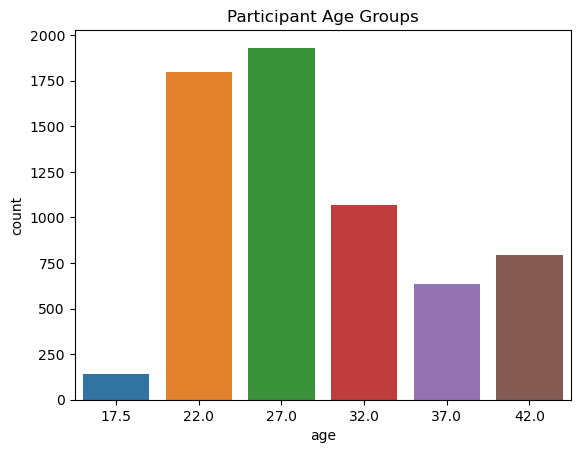

In [7]:
sns.countplot(data = affair_data, x = 'age').set(title = 'Participant Age Groups')
plt.show()

from this countplot, we can see the majority of the study's participants are 27 years old, with the second biggest group being 22 years old. It is interesting to see how the group is slashed in half when reaching the 32 year old age group. There seems to be an increasing pattern in the beginning, though the second half of the study's groups don't necessarily follow a pattern, though there isn't as dramatic of a rise and fall in participants. The smallest group, 17.5 year olds, is fascinating to me because there aren't that many, though it's important to remember the study was focused on married couples, so there likely weren't too many married couples of that age. 

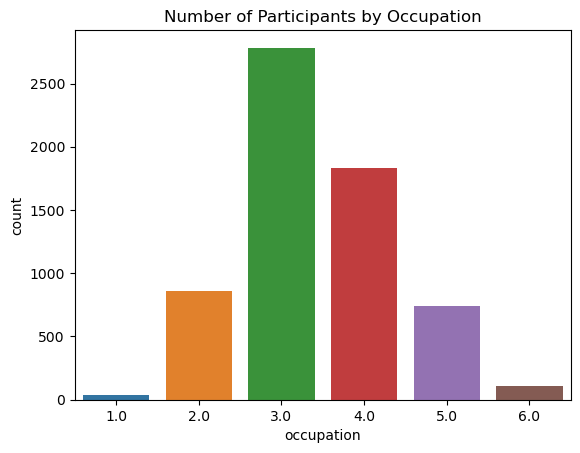

In [8]:
sns.countplot(data= affair_data, x = 'occupation').set(title= 'Number of Participants by Occupation')
plt.show()

There doesn't seem to be an exactly ethical way to figure out which participants are female/male, as there isn't a gender column. One could perpetrate gender stereotypes to try to figure out which participants are male based on education or profession but this would be out of touch with the reality that women are on track to overcome the number of students pursuing bachelor and graduate degrees. However, since this dataset was collected around the 70's, before women were more widely welcomed in the corporate world, we could assume that the professions listed under number 4 in the occupation variable represent women; additionally we could also assign the student category to women as they may have married while still in school, whereas the men in hetero relationships might've already been starting out their careers. Alternatively, in examining the "educ" variable, we could assume the values 9, 12, and 14 represent female participants, while 16, 17 and 20 represent men who may be more likely to have obtained their bachelors and even went on to puruse a graduate degree. 
I wouldn't be inclined to make assumptions such as this out of my own accord, but for the sake of the exercise, I have decided to focus on the occupation variable to deduce which participants may be women. 

In [9]:
#using occupation variable, assigning a presumed gender value to each participant
affair_data['presumed_gender'] = None

#if occupation is '4', then assign female, not 4 assign male
affair_data.loc[affair_data['occupation'] == 4, 'presumed_gender'] = 'F'
affair_data.loc[affair_data['occupation'] != 4, 'presumed_gender'] = 'M'

affair_data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,presumed_gender
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,M
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,M
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,M
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,M
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,M
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,F
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,M
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,M
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,M


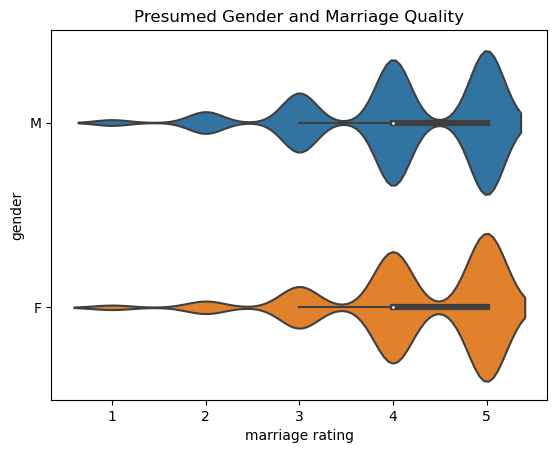

In [10]:
sns.violinplot(data = affair_data, x = 'rate_marriage', y = 'presumed_gender').set(
    title = 'Presumed Gender and Marriage Quality', xlabel = 'marriage rating', ylabel = "gender")
plt.show()

From this violinplot we can see that the men and women in this study have a very similar rating for their respective marriages, with a bigger group classifying their marriage as "very good", and as we examined earlier, the mean for both groups is right around a 4, indicating they perceive their marriages as "good". 

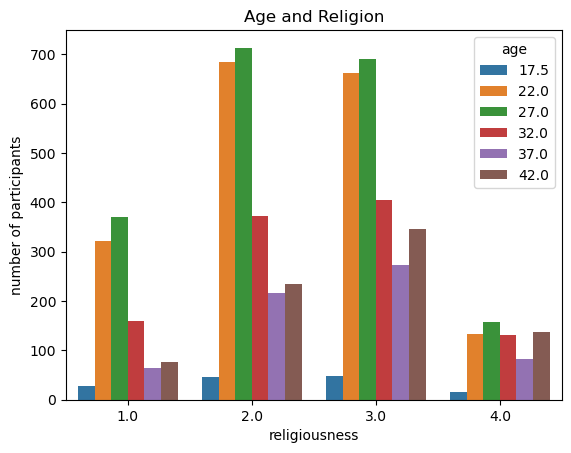

In [11]:
sns.countplot(data = affair_data, x = 'religious', hue = 'age').set(
title = 'Age and Religion', xlabel = 'religiousness', ylabel = 'number of participants')
plt.show()

It's a bit fascinating to see how these age groups religiouesness follow a slightly similar pattern in each category, albeit proportional to their populations. It's also important to note that the "very" religious group, 4, doesn't attract as many of the participants, whereas the "mildly", and "fairly" religious groups are almost identical in proportion. An assumption I had prior to seeing this plot was that we'd see more of the 37 and 42 year old participants in groups 3 and 4, and not so much in 1 and 2, which isn't true. 

In [12]:
#adding new column to add education labels and make it a bit clearer
affair_data['education'] = None

affair_data.loc[affair_data['educ'] == 9, 'education'] = 'grade school'
affair_data.loc[affair_data['educ'] == 12, 'education'] = 'high school'
affair_data.loc[affair_data['educ'] == 14, 'education'] = 'some college'
affair_data.loc[affair_data['educ'] == 16, 'education'] = 'college graduate'
affair_data.loc[affair_data['educ'] == 17, 'education'] = 'some graduate school'
affair_data.loc[affair_data['educ'] == 20, 'education'] = 'advanced degree'

affair_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,presumed_gender,education
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,M,some graduate school
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,M,some college
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,M,college graduate
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,M,college graduate
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,M,some college


<Axes: xlabel='affairs', ylabel='education'>

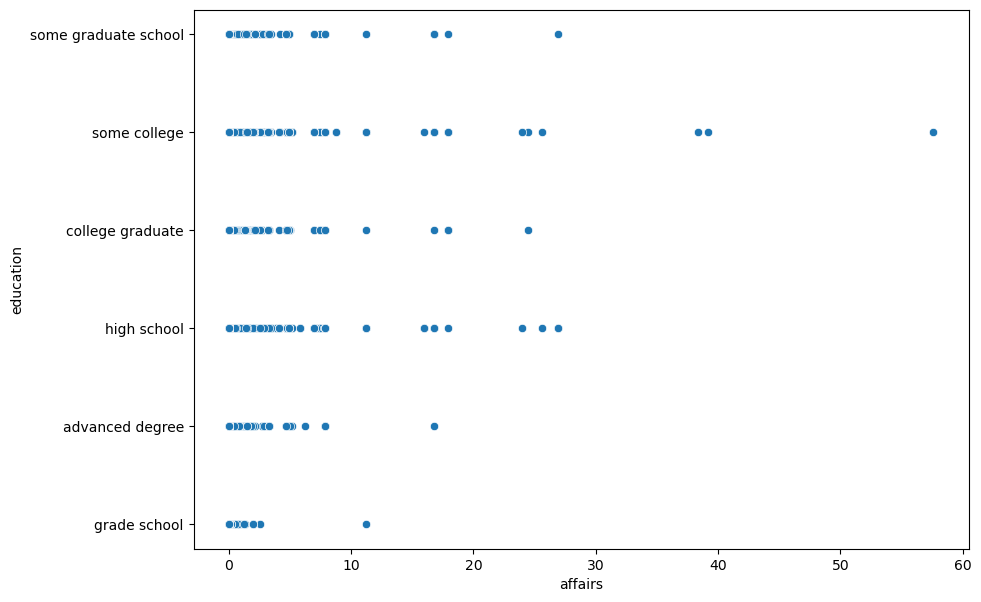

In [13]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = affair_data, x= 'affairs', y = 'education')

I was curious to see whether education played any significant role in whether participants engaged in extramarital affairs. The first thing that stood out to me was that the big outlier of '57' months spent in an extramarital affair is in the "some college" category. It was also interesting to see that for the participants with higher levels of education (16-20), most hovered right around 0 or not having had an affair, and the longest affair lasted about 30 months. 

(b) Suppose we want to explore the characteristics of participants who engage in extramarital sexual intercourse (i.e. affairs). Instead of modeling the number of affairs, consider the binary outcome - had an affair versus didn't have an affair. Create a new variable to capture this response variable of interest. What might the advantages and disadvantages of this approach to modeling the data be in this context?

In [14]:
#creating new variable
affair_data['had_affair'] = None

#setting affairs value at 0 = no affair, and anything above 0 as =had affair
affair_data.loc[affair_data['affairs'] == 0, 'had_affair'] = 0
affair_data.loc[affair_data['affairs'] > 0, 'had_affair'] = 1

#examining new column
affair_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,presumed_gender,education,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,M,some graduate school,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,M,some college,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,M,college graduate,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,M,college graduate,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,M,some college,1


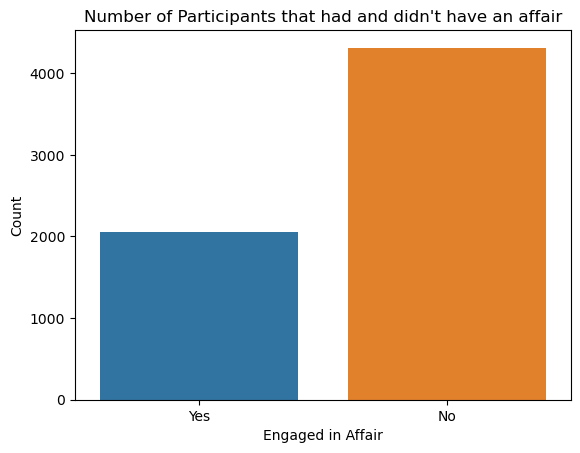

In [15]:
#creating copy of data
affair_plotting = affair_data.copy()
affair_plotting['had_affair'] = affair_data['had_affair'].map({0: 'No', 1: 'Yes'})

#plotting
sns.countplot(data = affair_plotting, x = 'had_affair'). set(
title = 'Number of Participants that had and didn\'t have an affair', xlabel = 'Engaged in Affair', ylabel = 'Count')
plt.show()

An advantage to focusing on just whether a participant had or didn't have an affair to then look at other chartacteristics would allow for a simpler focus, allowing the research to focus less on the length of time spent in an affair and look at other characteristics that may influence a person to engage in an affair at all. A disadvantage of doing this is that people are complex, and if we're wanting to look at potential factors that may influence an individual's likeliness of having an affair, the time spent in one may matter more than we think. For example, we may fail to capture that individuals that have short affairs typically rate their marriages a bit better than those who have longer affairs, or other things like that. 

(c) Use an appropriate regression model to explore the relationship between having an affair and other personal characteristics. Comment on which covariates seem to be predictive of having an affair and which do not.

In [16]:
affair_data.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
presumed_gender     object
education           object
had_affair          object
dtype: object

In [17]:
affair_data['had_affair'] = affair_data['had_affair'].astype(int)
affair_data.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
presumed_gender     object
education           object
had_affair           int64
dtype: object

In [18]:
affair_data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'presumed_gender',
       'education', 'had_affair'],
      dtype='object')

In [19]:
#will do logistic regression since the outcome we're looking for is qualitative
#use all variables
logreg_model = sm.Logit(affair_data['had_affair'], affair_data[['rate_marriage', 'age', 'yrs_married',
                'children', 'religious', 'educ', 'occupation', 'occupation_husb']])
log_model = logreg_model.fit()

Optimization terminated successfully.
         Current function value: 0.558228
         Iterations 5


In [20]:
#examining results
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6358
Method:                           MLE   Df Model:                            7
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                  0.1121
Time:                        15:30:38   Log-Likelihood:                -3553.7
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                1.506e-189
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
rate_marriage      -0.5653      0.028    -19.910      0.000      -0.621      -0.510
age                 0.0104      0.008      1.264      0.206      -0.006       0.026
yrs_married         0.0514      0.010      5.412      0.000       0.033       0.070
children            0.0341      0.031      1.111      0.267      -0.026       0.094
religious          -0.2882      0.033     -8.612      0.000      -0.354      -0.223
educ                0.0388      0.014      2.839      0.005       0.012       0.066
occupation          0.1830      0.033      5.493      0.000       0.118       0.248
occupation_husb     0.0407      0.022      1.810      0.070      -0.003       0.085
===================================================================================
"""

In [21]:
#examining AIC and BIC values
log_aic = log_model.aic
log_bic = log_model.bic

print(log_aic)
print(log_bic)

7123.359576672991
7177.429389535728


Based on my logistic regression model, the following covariates seem to have a predictive relationship with the had_affair variable: rate_marriage, yrs_married, religious, educ, and occupation. These variables all had p-values below our threshold of 0.05
the remaining variables (age, children, and occupation_husb) have larger p-values than our threshold, thereby not providing enough evidence to reject the null hypothesis of having no statistical significance on the dependent variable of a participant having an affair. 

Overall this model has an AIC of 7120 and a BIC of 7174, which I will use as a means to compare the following models.

(d) Use an all subsets model selection procedure to obtain a "best" fit model. Is the model different from the full model you fit in part (c)? Which variables are included in the "best" fit model?

I will use a for loop to try to capture all possible subsets to find the best model. Referenced this documentation to make the loop more efficient: https://docs.python.org/3/library/itertools.html
During the process of building the code below I encountered some errors/warnings about the outliers/highly influential data points, so I decided to remove the outlier that stood out to me the most during EDA phase, the 57 in the affairs column. 
Continued to encounter errors so I decided to check for multicollinearity by calculating the VIF. Referenced this: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [22]:
#removing outlier
outlier_index = affair_data.loc[affair_data['affairs'] > 57].index
outlier_index

affair_data = affair_data.drop(outlier_index)

In [23]:
#importing statsmodels function to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 

predictors = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs']

#creating empty df to store vif values
vif_data = pd.DataFrame()
#adding column to identify predictors
vif_data['predictor'] = predictors
#calculating VIF for each predictor
vif_data['VIF'] = [variance_inflation_factor(affair_data[predictors].values, i) for i in range(len(predictors))]

vif_data

,predictor,VIF
0,rate_marriage,17.196374
1,age,75.090235
2,yrs_married,15.516129
3,children,4.890622
4,religious,8.717635
5,educ,47.777725
6,occupation,17.105670
7,occupation_husb,9.850257
8,affairs,1.146445


I realized I was mistakenly including the 'affairs' column, which we're not really using and had utilized to create the binary 'had_affair' variable that we're trying to predict.

In [24]:
#importing itertools
import itertools

#setting a predictors variable with column names, except for the constant and had_affair dependent variable
predictors = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb']

#initializing a subset list
subsets = []

#generating possible subsets of the independent variables/predictors
for i in range (1, len(predictors) + 1):
    subsets.extend(itertools.combinations(predictors, i))

#creating lists to store the results, wanted to capture both AIC and BIC values to see if the best model
#result differed depending on these metrics
best_model_aic = None
best_model_bic = None

#setting value to infinity as I don't yet know what max values the models may output and this can successfully
#perform the comparison/king-of-the-hill operation below
best_aic_value = float('inf')
best_bic_value = float('inf')

#iterating through possible combinations
for subset in subsets:
    X_subset = affair_data[list(subset)]
    model = sm.Logit(affair_data['had_affair'], X_subset)
    results = model.fit()
    aic_value = results.aic
    bic_value = results.bic
#finding the best fit from the loop    
    if aic_value < best_aic_value:
        best_aic_value = aic_value
        best_model_aic = results
    
    if bic_value < best_bic_value:
        best_bic_value = bic_value
        best_model_bic = results

Optimization terminated successfully.
         Current function value: 0.603221
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642702
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680707
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683110
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.620292
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626040
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635505
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637311
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.570432
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573048
  

Optimization terminated successfully.
         Current function value: 0.567529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564547
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569463
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567193
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564382
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562000
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564209
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568142
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569858
  

Optimization terminated successfully.
         Current function value: 0.559128
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.562755
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564197
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566083
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564189
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.558408
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560508
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.558774
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.563925
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560595
  

In [25]:
#printing results
print('Best AIC model:', best_model_aic.summary())
print('Best BIC model:', best_model_bic.summary())

Best AIC model:                            Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6365
Model:                          Logit   Df Residuals:                     6359
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                  0.1119
Time:                        15:30:41   Log-Likelihood:                -3553.4
converged:                       True   LL-Null:                       -4001.4
Covariance Type:            nonrobust   LLR p-value:                2.057e-191
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
rate_marriage      -0.5584      0.028    -20.181      0.000      -0.613      -0.504
yrs_married         0.0659      0.004     16.550      0.000       0.058       0.074
religious       

In [26]:
#old code from when i started working on the subsets manually
#subset 1
#sub1_model = sm.Logit(affair_data['had_affair'], affair_data[['rate_marriage', 'yrs_married',
#                'religious', 'educ', 'occupation']])
#sub1_model = sub1_model.fit()
#sub1_model.summary()
#examining AIC and BIC values
#sub1_aic = sub1_model.aic
#sub1_bic = sub1_model.bic

#print(sub1_aic)
#print(sub1_bic)

(e) Interpret the model parameters using the model from part (d).

Per AIC values, the best model fit included the following parameters: rate_marriage, yrs_married, religious, educ, occupation, and  occupation_husb. I almost thought this included everything, but realized it kept the age, and children variables out, which is very similar to the first logistic regression model where I included all variables and found the age and children weren't statistically significant. It was surprising to see the occupation_husb was included in this model. 

I was interested in comparing how the AIC and BIC results would compare because the former tends to favor more complex models, while BIC tends to choose simpler models. Based on this, it was a bit unsurprising that the number of variables included in that model are one less than the AIC model. This model included the variables I found statistically significant in the first regression model I built: rate_marriage, yrs_married, religious, educ, and occupation. 

The pseudo R squared values for both models are very similar 0.1119 and 0.1115, so choosing one over the other may not have as different consequences, though I would choose the second model. Since BIC leans toward simpler models it can help us increase prediction accuracy and decrease our chances of overfitting and it doesn't hurt that it's pseudo R squared value is slightly smaller as well. 

(f) Create an artificial test dataset where martial rating varies from 1 to 5 and all other variables are set to their means. Use this test dataset to obtain predicted probabilities of having an affair for case in the test data. Interpret your results and use a visualization to support your interpretation.

In [27]:
#inspecting data with describe to grab mean values
affair_data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000
mean,4.109505,29.083975,9.010448,1.396936,2.426394,14.209898,3.424195,3.849961,0.696435,0.322388
std,0.961440,6.847844,7.280235,1.433575,0.878256,2.178172,0.942458,1.346464,2.084921,0.467427
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,39.199982,1.000000


In [28]:
#creating synthetic data

#setting size to same number of observations as the original dataset
num_samples = 6366

#setting ratings to be any number between 1-5
synth_rate_marriage = np.random.randint(1,6, size = num_samples)

#assigning random outcomes to the had_affair variable, otherwise ~I think~ the results may be incorrect
synth_had_affair = np.random.choice([0,1], size = num_samples)

#creating synthetic data frame
synthetic_affair_data = pd.DataFrame({'rate_marriage': synth_rate_marriage, 'age': 29.1, 'yrs_married': 9.1, 
                        'children': 1.4, 'religious': 2.4, 'educ': 14.2, 'occupation': 3.4, 'occupation_husb': 3.8,
                        'affairs': 0.7, 'had_affair': synth_had_affair})
#examining output
synthetic_affair_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,0
1,1,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,0
2,3,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,1
3,2,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,0
4,1,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,0


In [29]:
#performing logistic regression again to get the predicted probabilities
#adding constant
synthetic_affair_data['constant'] = 1

#setting predictors to be everything other than the dependent variable
X_synth_test = synthetic_affair_data[['rate_marriage', 'age', 'yrs_married',
                'children', 'religious', 'educ', 'occupation', 'occupation_husb']]

#passing test variables to previous logreg model i built
synthetic_preds = log_model.predict(X_synth_test)

#adding the predicted probabilities to my synthetic df
synthetic_affair_data['affair_predictions'] = synthetic_preds
synthetic_affair_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair,constant,affair_predictions
0,3,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,0,1,0.439843
1,1,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,0,1,0.708651
2,3,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,1,1,0.439843
3,2,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,0,1,0.580182
4,1,29.1,9.1,1.4,2.4,14.2,3.4,3.8,0.7,0,1,0.708651


In [30]:
#checking what the max prediction probability in the data is 
max_prob = synthetic_affair_data['affair_predictions'].max()
max_prob #0.709073

#finding how many instances in the data had the max predicted probability
probability_100 = synthetic_affair_data.loc[synthetic_affair_data['affair_predictions'] == max_prob]
probability_100.shape

(1253, 12)

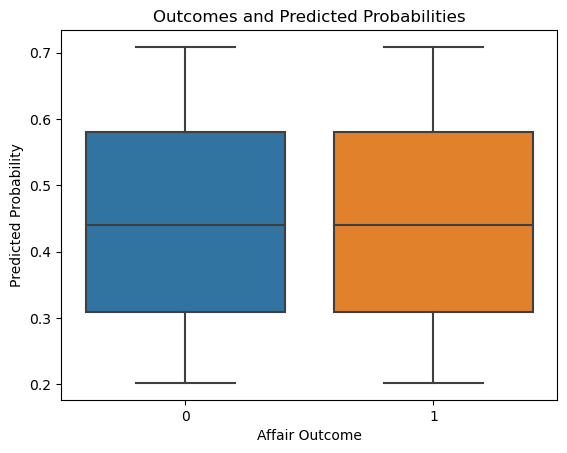

In [31]:
sns.boxplot(data = synthetic_affair_data, x = 'had_affair', y = 'affair_predictions').set(
title = 'Outcomes and Predicted Probabilities', xlabel = 'Affair Outcome', ylabel = 'Predicted Probability')
plt.show()

It is interesting to see in the first few rows how the model performs in assigning predicting probabilities for the outcomes of having and not having an affair. My model isn't super accurate, with this test/synthetic data, the max predicted probability of the model was 0.709073 or about 70%, which isn't terribly high. 
Additionally, as we can see from the boxplot above, it seems the highest prediction probability is a bit of an outlier as most predicted probabilites are concentrated between 0.3-0.6, with the median being a bit above 0.4 for both the having had an affair and not having an affair outcomes. 

(g) Reflect on your analysis in this problem. After completing all the parts of this analysis what remaining and additional ethical and privacy conerns do you have?

I didn't use the variable I created for deducing the participants gender, but an ethical concern I have would be regarding how this information is presumed. I think this shows how data like this can lead to a lot of generalizations about individuals, as well as perpetrate gender stereotypes, as well as other identity stereotypes, that could cause harm to the participants of these studies. 

### Problem 2

Points: 20

In this problem set, we will use some data from a sports context. The data is provided as part of the [Introduction to Statistial Learning with Applications in Python](https://www.statlearning.com/) textbook. It was taken from the StatLib library which is maintained at Carnegie Mellon University. The data provided is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

Following the directions below to load this data, `Hitters` directly from the `ISLP` python package. You may need to install the `ISLP` package before you can get started. In the Jupyter Hub you can open a terminal and use `pip install ISLP`. Next load the data as follows:

In [32]:
#installing ISLP
!pip install ISLP
from ISLP import load_data
Hitters = load_data('Hitters')

(a) Develop your own question to address in this analysis. Your question should be specific and measurable, and it should be able to be addressed through a basic analysis of the `Hitters` dataset. Hint: you will need to get to know this dataset and the variables available to formulate an appropriate question.

In [33]:
#referenced the islp documentation regarding data: https://islp.readthedocs.io/en/latest/datasets/Hitters.html
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [34]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [35]:
Hitters.shape

(322, 20)

In [36]:
Hitters.isnull().any()

AtBat        False
Hits         False
HmRun        False
Runs         False
RBI          False
Walks        False
Years        False
CAtBat       False
CHits        False
CHmRun       False
CRuns        False
CRBI         False
CWalks       False
League       False
Division     False
PutOuts      False
Assists      False
Errors       False
Salary        True
NewLeague    False
dtype: bool

In [37]:
missing_salaries = Hitters['Salary'].isnull().sum()
percent_missing_salaries = (missing_salaries/len(Hitters))*100
percent_missing_salaries

18.32298136645963

In [38]:
Hitters.dtypes

AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League       category
Division     category
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague    category
dtype: object

Question: What factors influence how many home runs a player has, does having more expertise mean they're more likely to be successful in a given season? is it the number of years they've been in a league or something else?

(b) Briefly summarize the dataset, describing what data exists and its basic properties. Comment on any issues that need to be resolved before you can proceed with your analysis.

This dataframe has mostly integer data, with the league and division being the only variables of categorical type. I think these variables can be converted to 1 and 0 since there are only 2 options. As described in the documentation, league has options of A and N and division has the options of E and W, so I could assign 0 to the first options and 1 to the latter. 
Thankfully most of the data is tidy, however, it seems a bit less than 20% of the salary data is missing though, so this may be a variable I don't work with or try to fix by potentially adding the mean of the salaries to the rows missing data. 

(c) Use the dataset to provide empirical evidence that addressed your question from (a). Discuss your results. Provide at least two visualizations to support your story.

In [39]:
Hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

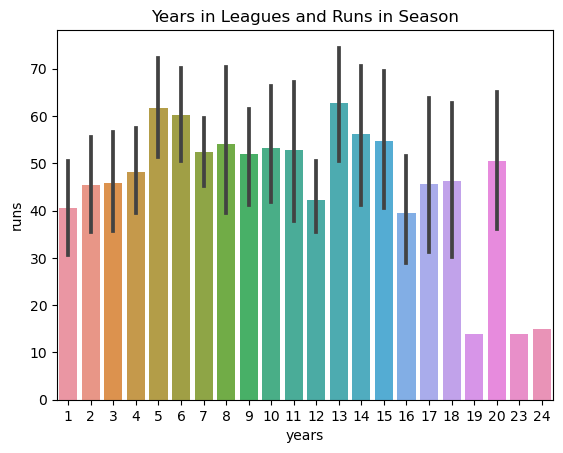

In [40]:
#plotting first variable of interest -years- vs runs
sns.barplot(data = Hitters, x = 'Years', y = 'Runs'). set(
title = 'Years in Leagues and Runs in Season', xlabel = 'years', ylabel = 'runs')
plt.show()

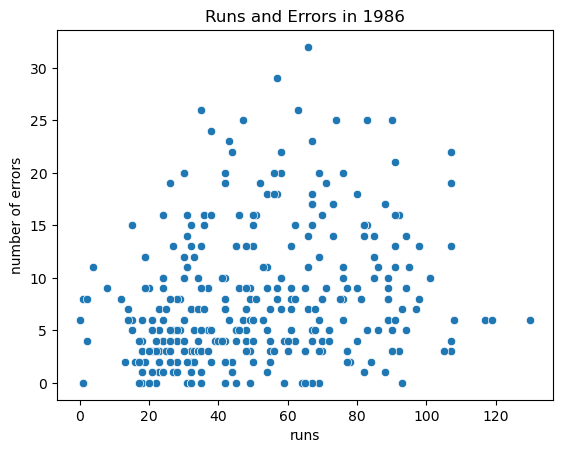

In [41]:
#plotting errors v runs
sns.scatterplot(data = Hitters, x = 'Runs', y = 'Errors').set(
title = 'Runs and Errors in 1986', xlabel = 'runs', ylabel='number of errors')
plt.show()

In [42]:
#finding what the smallest number of runs is because plot below sets the 1st bin to start at -.13
Hitters['Runs'].unique()
Hitters['Runs'].min()

0

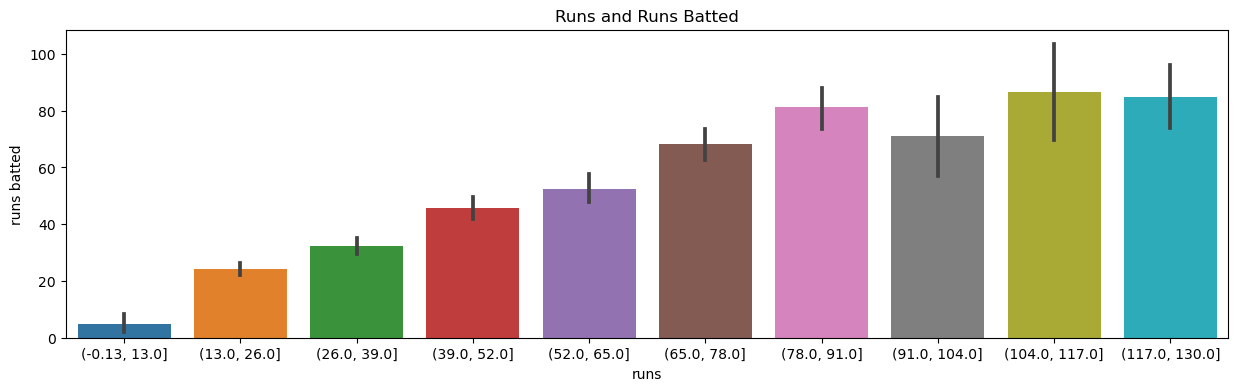

In [43]:
#resizing
plt.figure(figsize = (15, 4))

#adding bins so the plot is less busy
bins = pd.cut(Hitters['Runs'], bins = 10)

#plot
sns.barplot(data = Hitters, x = bins, y = 'RBI').set(title = 'Runs and Runs Batted', 
            xlabel = 'runs', ylabel = 'runs batted')
plt.show()

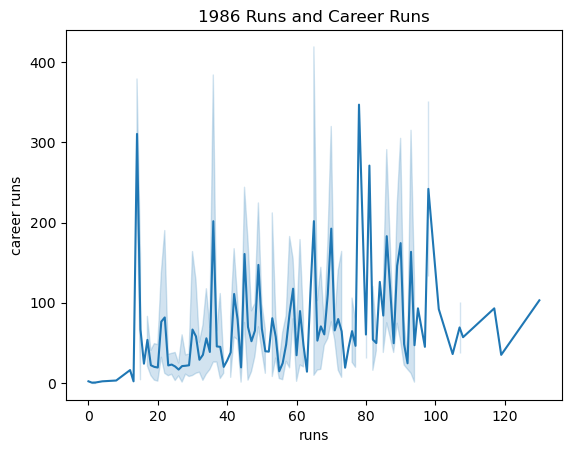

In [44]:
#plotting CHmRun v runs
sns.lineplot(data = Hitters, x = 'Runs', y = 'CHmRun').set(
title = '1986 Runs and Career Runs', xlabel = 'runs', ylabel='career runs')
plt.show()

(d) Comment the questions (and answers) in this analysis. Were you able to answer all of these questions? Are all questions well defined? Is the data good enough to answer all these?

My first question was whether the number of years a player has spent in the major leagues seemed to be an indicator of how many runs a player had in the season, from the first plot, we can see that this is not necessarily the case. The players that had spent 19, 23, and 24 years in the leagues had significantly less runs than the other playes, even including those with only 1 year in the league. I decided to see if perhaps the "errors" variable would show a stronger relationship, but there is none between it and runs. 
Although I'm not familiar with baseball, the number of runs and the number of runs batted sound like very similar variables so I decided to inspect them too and found that they have a somewhat linear relationship though some bins I created show a bit of a dip. 
The last variable I inspected was the relationship between a player's career runs and the season's runs to see if perhaps a higher number of career runs were an indicator of scoring a lot of runs in the season of interest, but there was no such clear relationship.

I think the question was well defined within the parameters of the dataset, and the data answered the question of whether expertise influenced how many home runs a player scored in a season. Additionally, it allowed me to investigate whether other variables could be better attributed to a player's success in a season.

### Problem 3

Points: 20

In this problem, we will use data available in [Machine Learning with R by Brett Lantz](https://subscription.packtpub.com/search?query=machine%20learning%20r). This data was available in the public domain and a few version exist online. 

The data describe individual medical costs billed by health insurance. For each observation, there is information about:
- age: age of primary beneficiary of the insurance policy
- sex: the person's sex, measured here a binary gender
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, (kg / m ^ 2)
- children: number of children/dependents covered by health insurance
- smoker: smoking status of the primary beneficiary
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: medical costs billed by health insurance

In our analysis, we will be interested in the relationship between `charges` and the individual characteristics measured. 

In [45]:
df = pd.read_csv('insurance.csv')

In our analysis, we will be interested in the relationship between charges and the individual characteristics measured.

(a) Examine the bivariate relationships present in the data. Briefly discuss notable results.

In [46]:
#examining data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [48]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [49]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [50]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [52]:
#using hot key encoding technique to convert the categorical variables to binary: sex, smoker, region
insurance = pd.get_dummies(df, columns = ['sex', 'smoker'], drop_first = True)
insurance = pd.get_dummies(insurance, columns = ['region'], drop_first = False)

In [53]:
#northeast, southeast, southwest, northwest.
insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [54]:
insurance.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


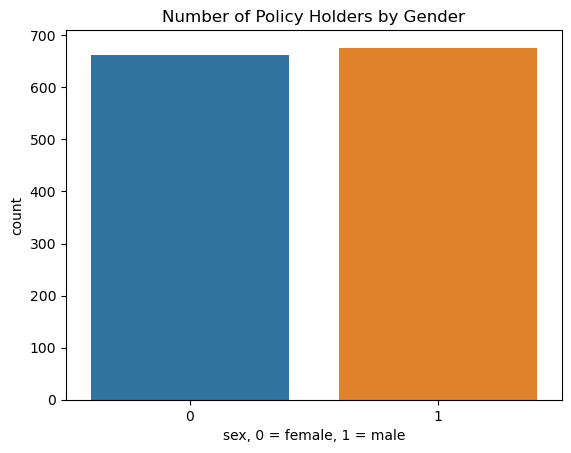

In [55]:
sns.countplot(data = insurance, x = 'sex_male').set(
title = 'Number of Policy Holders by Gender', xlabel = 'sex, 0 = female, 1 = male')
plt.show()

<Axes: xlabel='sex_male', ylabel='charges'>

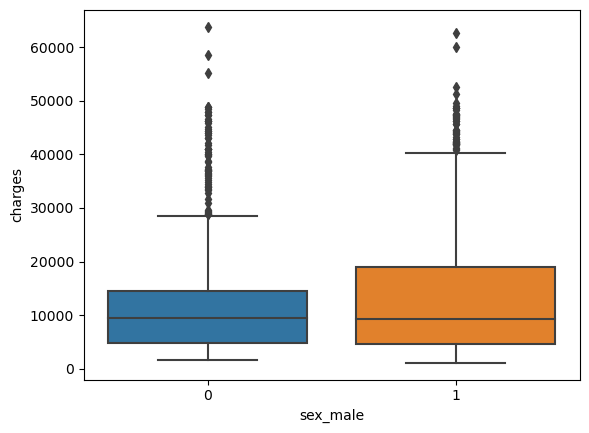

In [56]:
sns.boxplot(data = insurance, x = 'sex_male', y = 'charges')

<Axes: xlabel='age', ylabel='charges'>

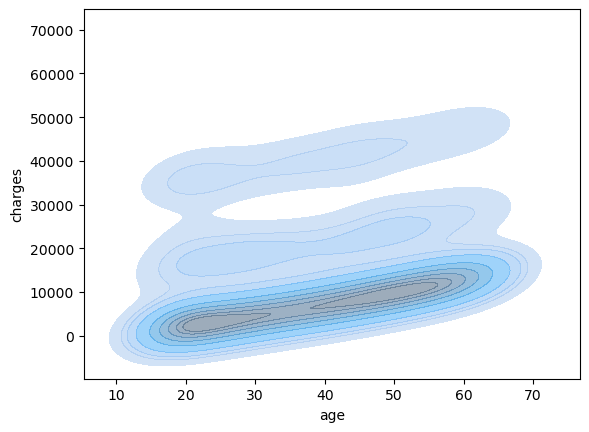

In [57]:
sns.kdeplot(data = insurance, x = 'age', y = 'charges', fill = True, alpha = .5)

<Axes: xlabel='bmi', ylabel='charges'>

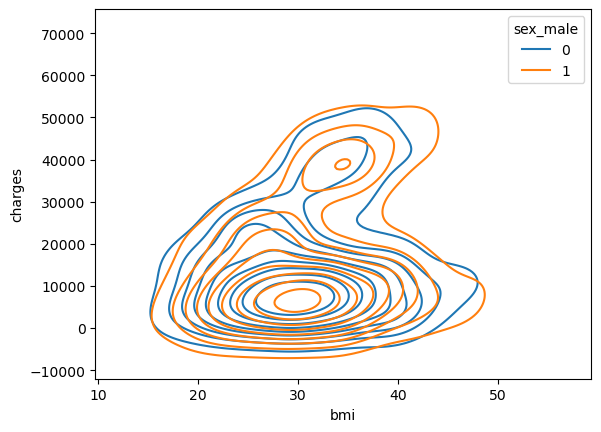

In [58]:
sns.kdeplot(data = insurance, x = 'bmi', y = 'charges', hue = 'sex_male')

<Axes: xlabel='children', ylabel='charges'>

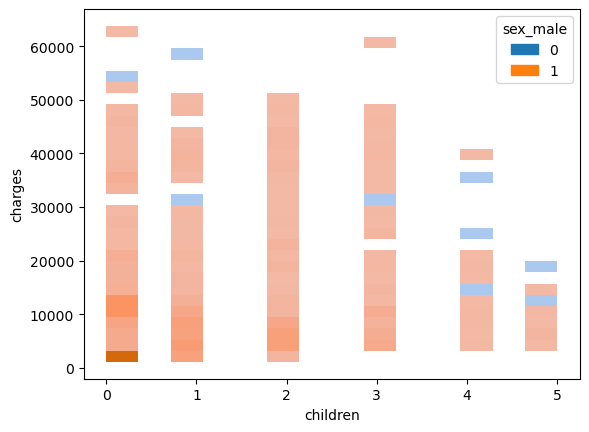

In [59]:
sns.histplot(data = insurance, x = 'children', y = 'charges', hue = 'sex_male')

In [60]:
#dropping response variable from predictors list
predictor_list = list(insurance.columns.drop('charges'))
#initializing lists to store results in
predictors = []
t_tests = []

#looping through predictors and performing t-tests
for predictor in predictor_list:
    t_test, p_value = stats.ttest_ind(insurance['charges'], insurance[predictor], equal_var=True)
    predictors.append(predictor)
    t_tests.append((t_test, p_value))

#adding results to a df
t_p_stats_df = pd.DataFrame({'predictor_variable': predictors, 't_stat & p-value': t_tests})
#inspecting results
t_p_stats_df

,predictor_variable,t_stat & p-value
0,age,"(39.96528853055413, 2.937026592465485e-274)"
1,bmi,"(39.99111666529812, 1.5383565479089667e-274)"
2,children,"(40.08043408868691, 1.642422871191252e-275)"
3,sex_male,"(40.082215419100066, 1.5707339997856723e-275)"
4,smoker_yes,"(40.083122945258744, 1.5354226097474645e-275)"
5,region_northeast,"(40.083010067526295, 1.5397710403899475e-275)"
6,region_northwest,"(40.08300780997554, 1.5398581343188682e-275)"
7,region_southeast,"(40.082919765615365, 1.5432586372575678e-275)"
8,region_southwest,"(40.08300780997554, 1.5398581343188682e-275)"


From the small p-values above, it seems all of these predictor varaibles have a statistically significant relationship to the charges response variable of interest. 
From the plotted distributions, we can see that the majority of the charges hover below the 20k range across all age groups. The biggest age group density ranges from 20-60 with the majority of their charges right under 10k or below. 
It was also interesting to see that although nearly half of policy holders are female, male policy holders seem to make up the majority of the individuals in the dataset that have children. It was also interesting to see how those with less children had higher charge amounts than those that had 5 children for example. Although there are definitely large outliers in both male and female policy holder groups, it was intersting to see how the distribution in the boxplot for women shows their charges being more concentrated between 5-15k, whereas the range for men was a bit larger from 5-20k. 
Lastly, I was curious to see what the BMI distribution looked like in regard to the charges variable as well as see how it may differ across men and women. Notably, it seems both men and women have similar BMI distributions, and the charges also didn't seem to significantly increase for those with BMI's of 50, though this could be due to a smaller population with that BMI value. 

(b) Fit a multiple linear regression model. How much variance in the medical costs(charges) does this variable- bmi explain?

In [61]:
print(predictor_list)

['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


In [62]:
#adding a constant
insurance['constant'] = 1

#setting x and y values; adding all predictors
X = insurance[['age','bmi','children','sex_male','smoker_yes','region_northeast','region_northwest',
               'region_southeast', 'region_southwest', 'constant']]

y = insurance['charges']


#splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 626)

In [73]:
#writing the following chunk as a function so I can use it in the stepwise selection prompt below
def fit_multiple_reg_model(predictors, response):
    
    #multiple regression model & fit
    multiple_reg_model = sm.OLS(response, predictors)
    multiple_reg_fit = multiple_reg_model.fit()
    
    return multiple_reg_fit
    

model_1 = fit_multiple_reg_model(X_train, y_train)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     335.3
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          1.62e-267
Time:                        15:34:12   Log-Likelihood:                -9474.4
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     927   BIC:                         1.901e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                252.9712     14.306     17.682      0.000     224.894     281.048
bmi                369.6617     34.991     10.564      0.000     300.990     438.333
children           483.2236    166.253      2.907      0.004     156.947     809.500
sex_male          -300.0757    399.606     -0.751      0.453   -1084.314     484.162
smoker_yes        2.316e+04    493.883     46.900      0.000    2.22e+04    2.41e+04
region_northeast -1749.7809    396.265     -4.416      0.000   -2527.460    -972.101
region_northwest -2606.7085    400.412     -6.510      0.000   -3392.528   -1820.889
region_southeast -3235.4934    458.336     -7.059      0.000   -4134.989   -2335.998
region_southwest -2823.7982    421.277     -6.703      0.000   -3650.565   -1997.032
constant         -1.042e+04    937.811    -11.106      0.000   -1.23e+04   -8575.302
==============================================================================
Omnibus:                      190.184   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.929
Skew:                           1.176   Prob(JB):                     1.72e-81
Kurtosis:                       5.002   Cond. No.                     2.12e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.41e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the multiple linear regression model, in the training data, it seems that for every unit change in BMI, the charges are increas by 369.6617 units. 

(c) Evaluate the statistical assumptions in your regression analysis from part (b) by performing a basic analysis of model residuals and any unusual observations. Discuss any concerns you have about your model.

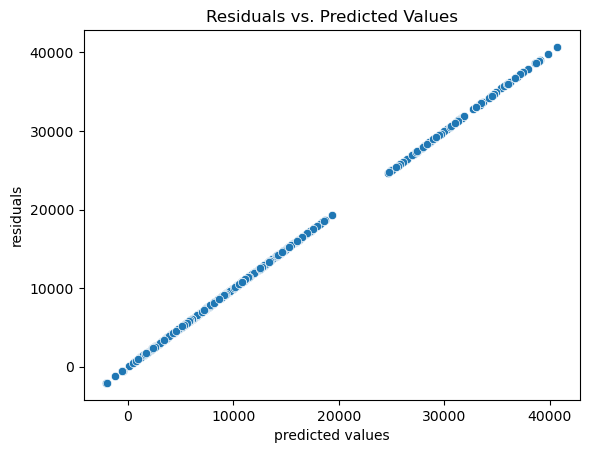

In [74]:
#making predictions with test data
y_preds = model_1.predict(X_test)

residual_test = y_test = y_preds

#plotting residuals
sns.scatterplot(data = insurance, x=y_test, y=residual_test).set(
title='Residuals vs. Predicted Values', xlabel='predicted values', ylabel='residuals')
plt.show()

The residuals have a discernible pattern, so I'm concerned about the model's reliabilty as it seems to violate the assumption of linearity. Since the pattern seen is a distinct line, we can infer the model isn't accurately capturing the relationship among the response and predictor variables.

(d) Use a stepwise model selection procedure of your choice to obtain a "best" fit model. Is the model different from the full model you fit in part (b)? If yes, how so?

In [75]:
X_train.shape

(936, 10)

In [76]:
X_test.shape

(402, 10)

In [81]:
#MODEL 2:

#replicating x_train data
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

#doing backward selection, removing sex_male variable
X_train_2 = X_train_copy.drop('sex_male', axis = 1)
X_test_2 = X_test_copy.drop('sex_male', axis = 1)

#fitting model
model_2 = fit_multiple_reg_model(X_train_2, y_train)
model_2_preds = model_2.predict(X_test_2)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     383.3
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          1.05e-268
Time:                        15:35:21   Log-Likelihood:                -9474.7
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     928   BIC:                         1.900e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                252.9940     14.303     17.688      0.000     224.924     281.064
bmi                367.3088     34.843     10.542      0.000     298.929     435.688
children           477.5466    166.042      2.876      0.004     151.685     803.409
smoker_yes        2.313e+04    492.034     47.014      0.000    2.22e+04    2.41e+04
region_northeast -1765.0618    395.649     -4.461      0.000   -2541.532    -988.592
region_northwest -2611.8008    400.261     -6.525      0.000   -3397.322   -1826.280
region_southeast -3250.6233    457.785     -7.101      0.000   -4149.037   -2352.210
region_southwest -2843.6044    420.351     -6.765      0.000   -3668.554   -2018.655
constant         -1.047e+04    934.695    -11.203      0.000   -1.23e+04   -8636.730
==============================================================================
Omnibus:                      190.176   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.284
Skew:                           1.175   Prob(JB):                     1.44e-81
Kurtosis:                       5.006   Cond. No.                     2.10e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
#continuing backward selection, removing children variable
X_train_3 = X_train_copy.drop(['sex_male', 'children'], axis = 1) 

#fitting model
model_3 = fit_multiple_reg_model(X_train_3, y_train)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     442.3
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          2.93e-268
Time:                        15:35:50   Log-Likelihood:                -9478.9
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     929   BIC:                         1.901e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                255.2555     14.337     17.804      0.000     227.119     283.392
bmi                365.7396     34.974     10.457      0.000     297.102     434.377
smoker_yes        2.314e+04    493.951     46.844      0.000    2.22e+04    2.41e+04
region_northeast -1684.3495    396.194     -4.251      0.000   -2461.888    -906.811
region_northwest -2487.9030    399.490     -6.228      0.000   -3271.911   -1703.895
region_southeast -3180.3300    458.918     -6.930      0.000   -4080.965   -2279.695
region_southwest -2722.9848    419.888     -6.485      0.000   -3547.023   -1898.947
constant         -1.008e+04    928.134    -10.856      0.000   -1.19e+04   -8254.085
==============================================================================
Omnibus:                      189.267   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.572
Skew:                           1.172   Prob(JB):                     9.24e-81
Kurtosis:                       4.988   Cond. No.                     1.67e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.66e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The best model fit was model 2: all variables - sex_male

I decided to do backward selection as I trained my multiple linear regression on all the variables and wanted to see how removing variables improved or harmed the model's accuracy. 
I started by removing the "sex_male" variable since this was the only one in the first model with a p-value larger than 0.05/threshold.
The resulting model had variables with p-values below .05, in fact all but one had .000, so I decided to experiment with removing the only other variable that had a value other than .000, "children". 
From the original model, the second model I built without the sex_male variable improved slightly. The adjusted r squared value remained the same in both models 1 and 2, but worsened slightly on the third going from 0.741 to 0.739, where the sex_male and children variables were removed. 


When comparing AIC and BIC values, I found the second model to be the overall best. When examining AIC and BIC values to find the better balance between fit and model complexity I compared the following:

Model 1: AIC = 18970, BIC = 19010
Model 2: AIC = 18970, BIC = 19000
Model 3: AIC = 18970, BIC = 19010

By AIC alone, all the models were the same. From BIC values, the first model with all independent variables and the third with all but sex_male and children performed the same, which was surprising because BIC tends to favor simpler models overall. The second model was the better one from this metric, as the BIC value went from 19010 to 19000, even if it's a minor difference.

The only difference in model 2 from the one fit in part b was the removal of the sex_male variable, indicating gender doesn't have a statistically significant relationship to the charges response variable and could therefore be removed.

(e) Assess the model (from part (d)) generalizability. Perform a 10-fold cross validation to estimate model performance. Report the results.

In [86]:
#referenced this documentation: https://scikit-learn.org/stable/modules/cross_validation.html

#setting k-fold size
kf = KFold(n_splits = 10)

#initializing list for MSE
mses = []

#splitting data into training and validation folds
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_validation_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_validation_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    #multiple regression model & fit
    multiple_reg_model = sm.OLS(y_train_fold, X_train_fold)
    multiple_reg_fit = multiple_reg_model.fit()
    
    #testing model fit with validation set
    y_pred_fold = multiple_reg_fit.predict(X_validation_fold)
    
    #calculating mse of test/validation data
    mse_fold = mean_squared_error(y_validation_fold, y_pred_fold)
    mses.append(mse_fold)
    
average_mse = round(sum(mses) / len(mses), 4)    
average_mse

37188780.7304

In [87]:
#calculating model 2's mse
mse_model_2 = round(mean_squared_error(y_test, model_2_preds), 4)
mse_model_2

23295.9573

In [89]:
mse_model_2 - average_mse 

-37165484.7731

Since the charges in the dataset are most likely measured in the thousands, the average MSE seems to be rather large for the kfold validation. It seems the second model that excluded the 'sex_male' variable performed better. Regarding MSE values, the average MSE from the kfold validation was significantly larger than the one from the second model. 

EXTRA CREDIT: Fit a regression tree using the same covariates in your "best" fit model from part (d). Use cross validation to select the "best" tree. Compare the models from part (d) and (f) based on their performance. Which do you prefer? Be sure to justify your preference.

### Problem 4

Points: 20

The Wisconsin Breast Cancer dataset is available as a comma-delimited text file on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Our goal in this problem will be to predict whether observations (i.e. tumors) are malignant or benign. We will use the original dataset in this problem. 

(a) Obtain the data, and load it into your programming environment by pulling it directly from the web. (Do **not** download it and import it from a CSV file.) Give a brief description of the data. 

In [227]:
#importing icu package
!pip install ucimlrepo

#there were a few options for the data so I chose this one since it seemed fit for the 
#regression to be done below: https://archive.ics.uci.edu/dataset/16/breast+cancer+wisconsin+prognostic

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata


In [266]:
#importing dataset, with the provided code from here: https://archive.ics.uci.edu/dataset/16/breast+cancer+wisconsin+prognostic
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_prognostic = fetch_ucirepo(id=16) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_prognostic.data.features 
y = breast_cancer_wisconsin_prognostic.data.targets 
  
# variable information 
print(breast_cancer_wisconsin_prognostic.variables) 
X

                  name     role         type demographic description units  \
0                   ID       ID      Integer        None        None  None   
1                 Time  Feature      Integer        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0
196,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN


In [267]:
X.isnull().any()

Time                  False
radius1               False
texture1              False
perimeter1            False
area1                 False
smoothness1           False
compactness1          False
concavity1            False
concave_points1       False
symmetry1             False
fractal_dimension1    False
radius2               False
texture2              False
perimeter2            False
area2                 False
smoothness2           False
compactness2          False
concavity2            False
concave_points2       False
symmetry2             False
fractal_dimension2    False
radius3               False
texture3              False
perimeter3            False
area3                 False
smoothness3           False
compactness3          False
concavity3            False
concave_points3       False
symmetry3             False
fractal_dimension3    False
tumor_size            False
lymph_node_status      True
dtype: bool

In [268]:
y.isnull().any()

Outcome    False
dtype: bool

In [269]:
#adding the outcome column to the X dataframe in one DF
uci_data = pd.concat([X, y], axis=1)
uci_data

,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status,Outcome
0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0,N
1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0,N
2,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0,N
3,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0,N
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0,N
194,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0,N
195,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0,N
196,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN,R


In [270]:
uci_data.shape

(198, 34)

In [271]:
uci_data.dtypes

Time                    int64
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
tumor_size            float64
lymph_node_status     float64
Outcome   

In [272]:
uci_data.describe()

,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
count,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,194.000000
mean,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,...,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.211340
std,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,...,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.479276
min,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,...,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,...,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,...,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


It seems the only column with missing values is the "lymph_node_status" one. 
The data has 198 rows/observations and 34 variables that contain float values for the most part, only time is in integer type and the outcome column is an object type, which I think might need to be changed to 0 and 1 in order to do regression. 

(b) Tidy the data, ensuring that each variable is properly named and cast as the correct data type. Discuss any missing data.

In [273]:
#checking how many rows are missing data in lymph node stat col
missing_lns = uci_data['lymph_node_status'].isnull().sum()
missing_lns
#calculating % this represents
missing_lns_percent = (missing_lns/len(uci_data))*100
missing_lns_percent

2.0202020202020203

In [274]:
#mapping the 'N' and 'R' values from the outcome column to binary for regression
uci_data['cancer_recurred'] = uci_data['Outcome'].map({'R': 1, 'N': 0})
uci_data

,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status,Outcome,cancer_recurred
0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0,N,0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0,N,0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0,N,0
3,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0,N,0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0,R,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0,N,0
194,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0,N,0
195,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0,N,0
196,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN,R,1


In [275]:
#inspecting new dtypes
uci_data.dtypes

Time                    int64
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
tumor_size            float64
lymph_node_status     float64
Outcome   

In [276]:
#inspecting missing data points
missing_data = uci_data[uci_data['lymph_node_status'].isnull()]
missing_data

,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status,Outcome,cancer_recurred
6,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.1213,0.08910,0.1727,...,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,NaN,N,0
28,12,16.74,21.59,110.10,869.5,0.09610,0.1336,0.1348,0.06018,0.1896,...,0.1563,0.3835,0.5409,0.1813,0.4863,0.08633,1.5,NaN,N,0
85,72,14.45,20.22,94.49,642.7,0.09872,0.1206,0.1180,0.05980,0.1950,...,0.1552,0.4056,0.4967,0.1838,0.4753,0.10130,1.5,NaN,N,0
196,3,21.42,22.84,145.00,1440.0,0.10700,0.1939,0.2380,0.13180,0.1884,...,0.1498,0.4379,0.5411,0.2215,0.2832,0.08981,3.0,NaN,R,1


In [277]:
#performing mean imputation on the missing data
uci_data['lymph_node_status'].fillna(uci_data['lymph_node_status'].mean(), inplace = True)

#confirming this was done correctly
uci_data['lymph_node_status'].isnull().any()

False

As stated in the first part, the only data that's missing pertains to the lymph node status column, but it's only 4 rows that have missing values or about 2%, which shouldn't cause too many issues in a regression model. I inspected the specific instances to determine whether the data is missing at random /missing completely at random or not missing at random to determine how to handle these data points. I decided to mean imputate these observations to reduce any chances of issues with a regression model. 

(c) Split the data into a training and validation set such that a random 70\% of the observations are in the training set.

In [278]:
#was having an error in the code below, so checked y variable was set to binary
can_values = uci_data['cancer_recurred'].unique()
can_values #found a value of 3 and found my imputation was done incorrectly

#fixed mean imputation and confirmed things were correct
non_binary = uci_data[uci_data['cancer_recurred'] > 1]
non_binary

,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status,Outcome,cancer_recurred


In [279]:
#importing sklearn modules to do this
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

#getting features/explanatory variables
X = uci_data.drop(columns=['Outcome', 'cancer_recurred'])

#getting the outcome/target
y = uci_data['cancer_recurred']

#splitting data so 70% is for training, adding random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

(d) Fit a regression model to predict whether tissue samples are malignant or benign. Classify cases in the validation set. Compute and discuss the resulting confusion matrix. Be sure to address which of the errors that are identified you consider most problematic in this context.

In [282]:
#logistic regression code -added max_iter parameter because i was getting a warning about it
logreg = LogisticRegression(max_iter = 10000)

#training model
training_model = logreg.fit(X_train, y_train)

#training preds
uci_training_preds = logreg.predict(X_train)

#making predictions on validating/testing set
uci_test_preds = logreg.predict(X_test)

#computing confusion matrix for test/validating set
uci_logreg_conf_matrix = confusion_matrix(y_test, uci_test_preds)
uci_logreg_conf_matrix

array([[42,  3],
       [ 8,  7]])

From the resulting confusion matrix we can see there are 42 true negative outcomes, 3 false negatives, 8 false positives and 7 true positives. This means that 42 samples were correctly classified as benign, and 7 benign samples were incorrectly classified as malignant. On the other hand, 3 malignant samples were incorrectly classified as bening but another 8 malignant samples were correctly classified as such. It seems the model is better at predicting true negative results, because it predicted 42 and only missed 8 that were mistakenly classified and ended up being false positives. For positive cases, 7 were correctly predicted but 3 were missed as they ended classified as false negative. I think the classes in this data are imbalanced, since the positive cases were supposed to be 10 and the negative cases overall were supposed to be 50, we can see how the model would be better able to catch the negatives than the positives. 

### Problem 5

Points: 10

Please answer the questions below by writing a short response. 

(a) Describe three real-life applications in which **classification** might be useful. Describe the response, as well as the predictors. Is the goal in each application inference or predictions? Explain your answer. 

1. Spam e-mail detection: the response variable would be a binary where 0 = non spam, and 1 = spam. The predictors in this case would be sender email address, wording in the email, if there are any potentially malicious files attached. The goal in this case would be inference because it's trying to classify the emails received appropriately and store them in the proper bins, rather than predict whether more spam emails will be received in the future. The inference is more helpful to users because it presents a layer of protection so to speak, to prevent them from opening emails that have viruses embedded in files, etc. 

2. Medical diagnosis: the response variable would also be in binary where 0 = doesn't have the disease, and 1 = has the disease. The predictors in this case would encompass the symptoms displayed by the patient, and potentially also include medical history factors depending on the disease of interest. The goal here would be prediction, to properly treat the patient. 

3. Image classification: the response variable can also be binary, where 0 = not the image of interest, and 1 = image of interest, for example cats. The predictor variables could encompass things like presence of ears, a tail, color, eye shape, presence of whiskers, etc. The goal for this type of application would be prediction because we're interested in correctly assigning a label to an image based on the present traits, rather than finding the relationship between the variables in the data. 

b) Describe three real-life applications in which **regression** might be useful. Describe the response, as well as the predictors. Is the goal in each application inference or predictions? Explain your answer. 

1. Marketing efforts/campaigns budgets: the response variable would be some quantity like number of increased website visits or number of new clients. The predictors in this case would be for example, the cost of advertising in specific different media types, historical spending amounts along with their specific outcomes. The goal in this case would be prediction, we would want our model to help us identify what forms of advertising will help us achieve a higher number of new clients or sales, whatever our specific metric is.

2. Analyze salary relationships with education attainment: the response variable would be an individual's yearly salary. The predictors would be the highest level of education obtained, perhaps age, role, etc. The goal in this case would be inference as we would hope to better understand the relationship between a person's education level, and other factors with their salary. 

3. Song popularity: in this case the response variable would be how many listens a specific song has. The predictor variables would include artist popularity, beats p/minute, genre, length of song, etc. The goal in this case would be of prediction; the model would aid us in making better predictions of how popular a song will be based on the predictors, and could be applied to how record labels find and invest in up and coming artists. 

(c) What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

1. Advantages of flexible model: This type of model can yield to more accurate predictions and capture true relationships better. In real world applications the relationships between predictors and response variables is rarely linear, so a more flexible model would be better suited for capturing that complexity. 

2. Disadvantages of flexible model: These models are more prone to overfitting/picking up on noise in the data if the model is trained with a rather high sensitivity. These models are also harder to unravel in terms of understanding how individual predictors influence the response variable. 

3. When a more flexible model is preferred: This type of model is preferable for when prediction is our goal, because this type of model is more complex it can be harder to interpret and explain to other stakeholders that aren't data scientists. However, since our goal is prediction, the interpretability of the model wouldn't be a high priority, allowing us to choose more flexible approaches. 

4. When a less flexible model is preferred: In cases of inference, a less flexible model like linear regression is preferred. When we want to understand how specific variables affect an outcome/response, we ideally seek to use more interpretable approaches so the relationships aren't clouded. 

### Problem 6

Points: 10

Suppose we have a dataset with five predictors, $X_1 =$ GPA, $X_2 =$ IQ, $X_3 =$ Race (1 for Female, and 0 for Male), $X_4 =$ Interaction between GPA and IQ, and $X_5 =$ Interaction between GPA and Gender. Note: the data here is limited as gender was collected as a binary variable.

The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model and get $\hat{\beta}_0=50, \hat{\beta}_1=20, \hat{\beta}_2=0.07, \hat{\beta}_3=35, \hat{\beta}_4=0.01$, and $\hat{\beta}_5=-10$. 

(a) Which answer is correct and why?

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

The answer would be ii "For a fixed value of IQ and GPA, females earn more on average than males."

Beta0 corresponds to the intercept, meaning the beta1 and beta2 coefficients for IQ and GPA are .07 and 20 respectively. The beta3 coefficient for gender being 35 indicates that the salary response increases by 35 units when the gender value increases by a unit. Since our binary values equate to 1 for female and 0 for male, we can attribute that when the gender value is 1 (female), we see the 35 unit increase in salary. 
I didn't choose option 4 because it seems we're not really concerned with GPA since we're holding them at a fixed value and the sentence negates itself in the second half.

(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.

I think the salary in this case would be 172.7k 
Since we know the intercept/Beta0 coefficient is 50, we start with that baseline. We then multiply the specific beta coefficients to the values corresponding to the IQ of 110, 4.0 GPA, and Gender = 1 (female). 

the calculation would look like this:
salary = B0 + B1*X1 + B2*X2 +B3*X3

In [283]:
salary = (50) + (20 * 4.0) + (.07 * 110) + (35 * 1)
salary

172.7

(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is little evidence of an interaction effect. Justify your answer.

False. This is a misleading statement; we would need to examine the p-value for the GPA/IQ interaction term in order to determine whether we have enough evidence to reject the null hypothesis and conclude whether this interaction term has statistical significance in the relationship to salary. 

### Problem 7 - Extra Credit

Points: Max. 2

Suppose that $X_1, \ldots X_n$ form a random sample from a Poisson distribution for which the mean $\theta$ is unknown, $(\theta>0)$.

(a) Determine the MLE of $\theta$, assuming that at least one of the observed values is different from 0. Show your work.

The poisson distribution formula is: f(x) =(e– λ λx)/x! (retrieved from: https://byjus.com/maths/poisson-distribution/#:~:text=The%20formula%20for%20the%20Poisson,%CE%BB%20%CE%BBx)%2Fx!)

Lamda is equal to y-hat which is the sample mean in the formula above. And the MLE formula is:
$$\hat{\lambda} = \frac{1}{n} \sum_{i=1}^{n} x_i$$ (I admittedly asked ChatGPT to help me figure out the code to print out the formula nicely to demonstrate my answer below)

The MLE of 𝜃 would be equal to the sample mean itself if at least one of the values is a number other than 0

(b) Show that the MLE of $\theta$ does not exists if every observed value is 0.

If every value is 0, then the sample mean would be 0, which would make the MLE = 0 but this would essentially translate into saying that whatever event we're interested in measuring never occurs and is why there is no variation in the data. Additionally, to truly be a poisson distribution, the mean would need to be greater than 0 so having a mean of 0 is outside of the scope/parameter of a poisson distribution. 

### Problem 8 - Extra Credit

Points: Max. 5

In this extra credit problem, you'll build a simple web scraper to collect and process text data. You'll write the code necessary to scrape lyrics for a desired artist. Your code should be structured such that one can easily execute your scraping functions for a given artist. There are three deliverables for this assignment:

1. A set of functions necessary for scraping the lyrics of a specific artist.
2. An example implementation of using your functions.
3. A file of example output from your notebook implementation.

The specific approach that you take to structuring your code is up to you, but the final output .csv data should have the following columns (each row is a song from an artist that you choose):

- Column 1: artist
- Column 2: album
- Column 3: song title
- Column 4: URL of song lyrics
- Column 5: song lyrics (all of the lyrics in one column)
- Column 6: number of words in the song

**Data Scraping:** The actual scraping of data should be supported by separate functions that accomplish these tasks:

1. Given an artist, identify all of their albums, songs, and links to songs.
2. Given a set of song links (from step 1), collect the lyrics to each song and store them in a data frame.

In order to do this, you'll need to understand the structure of your lyrics site. The site you use is up to you, but all of this information should be available on lyrics.com.

**Data Processing:**

Once you've scraped the data, you'll need to do some simple text analysis to generate your columns of interest (feel free to do this as part of step 2 above, the collection of lyrics for each song or as a separate step entirely). Recall you are aiming to count the number of words in each song.

**Example Implementation:**

You should demonstrate the implementation of your data scraping functions with a particular artist. To do this you can simply set an artist, and run your scraping functions. The way in which you choose to structure your functions is up to you, as long as the implementation and documentation is clear. One way in which we'll test this is changing the artist to confirm the flexibility of your implementation. 

It may look something like this:

In [ ]:
# NOTE THIS CODE WILL NOT RUN 
# UNTIL YOU WRITE YOUR WEB SCRAPING FUNCTIONS

# Get songs
artist = 'Adele'
all_songs = get_songs(artist) 

# Get lyrics -- internally, you may want to another function in your library, such as get_lyrics()
lyrics = get_all_lyrics(songs)

# Save data -- this function should identify the name of the artist and use it in the .csv file it saves
save_lyrics(lyrics)

(a) Write a function to get all the songs of a particular artist. 

(b) Write a function to get all the lyrics for a particular song. You may also want to write a function to get all the lyrics for a list of songs.  

(c) Choose a particular artist. Get all their songs. Get all the lyrics for their songs. Process the data so that you end up with a nice, tidy data structure as described in the instructions (i.e. the six columns listed above). Write out the data to a CSV file.  

(d) Produce one visualization of the data to aids in understanding the distribution of words in songs for a particular artist. Comment on what you find.  